In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
# Definitions

# Directorio de imagenes
dir_img = './../imagenes/P2_1'

# Data files
data_file = './../data/P3_2_1.txt'

In [3]:
# Creamos el directorio de imagenes
if not os.path.exists(dir_img):
	os.mkdir(dir_img)
else :
	os.system("rm -r " + dir_img)
	os.mkdir(dir_img)

In [4]:
# Get lines from data files
file = open(data_file, 'r')

# Read data in blocks of 5 lines
blocks = []

for i, line in enumerate(file):
	if i % 5 == 0:
		blocks.append([])
	blocks[-1].append(line)

# Close file
file.close()

In [5]:
# Review blocks to get the desired data
row_data = []

for block in blocks:

	splited_1 = block[0].split()
	splited_2 = block[1].split()
	splited_3 = block[2].split()
	splited_4 = block[3].split()
	splited_5 = block[4].split()

	elements = splited_1[4]
	blocks = splited_1[9]
	threads = splited_1[-2]
	repts = splited_2[4]
	time_host = splited_2[-2]
	time_dev = splited_3[-2]

	row_data.append({
		'elements': elements,
		'blocks': blocks,
		'threads': threads,
		'repts': repts,
		'time_host': time_host,	# MS
		'time_dev': time_dev	# MS
	})


In [6]:
# Convert row data to pandas DataFrame
df = pd.DataFrame(row_data)

# Convert columns to numeric
df['elements'] = pd.to_numeric(df['elements'])
df['blocks'] = pd.to_numeric(df['blocks'])
df['threads'] = pd.to_numeric(df['threads'])
df['repts'] = pd.to_numeric(df['repts'])
df['time_host'] = pd.to_numeric(df['time_host'])
df['time_dev'] = pd.to_numeric(df['time_dev'])

# Limit times to 2 decimal places
df['time_host'] = df['time_host'].round(3)
df['time_dev'] = df['time_dev'].round(3)

display(df)

# Get latex table
# code = df.to_latex(index=False)
# print(code)

,elements,blocks,threads,repts,time_host,time_dev
0,2700000000,10546875,256,1,12387.174,7840.289
1,2710000000,10585938,256,1,12428.247,7564.900
2,2720000000,10625000,256,1,12455.059,8129.852
3,2730000000,10664063,256,1,12605.989,7765.940
4,2740000000,10703125,256,1,12521.750,8026.393
...,...,...,...,...,...,...
74,3440000000,13437500,256,1,15851.402,9990.981
75,3450000000,13476563,256,1,13216.326,9042.138
76,3460000000,13515625,256,1,13567.317,10052.205
77,3470000000,13554688,256,1,15981.744,10673.323


In [7]:
# Remove atipical values using quantiles

# Host time
q1 = df['time_host'].quantile(0.25)
q3 = df['time_host'].quantile(0.75)

iqr = q3 - q1

df = df[(df['time_host'] >= q1 - 1.0 * iqr) & (df['time_host'] <= q3 + 1.0 * iqr)]

# Device time

q1 = df['time_dev'].quantile(0.25)
q3 = df['time_dev'].quantile(0.75)

iqr = q3 - q1

df = df[(df['time_dev'] >= q1 - 1.0 * iqr) & (df['time_dev'] <= q3 + 1.0 * iqr)]

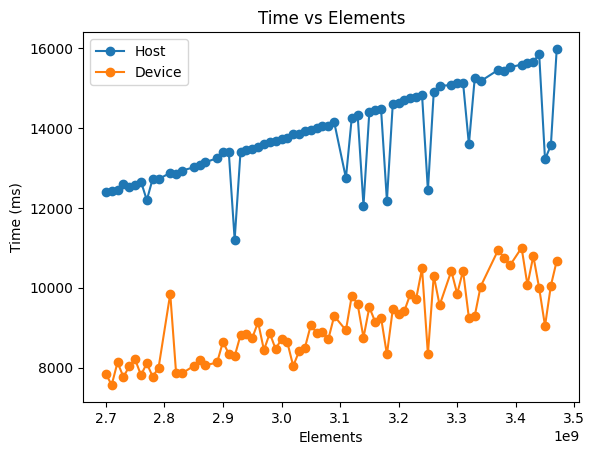

In [8]:
# Plot times vs elements

x_values = df['elements']

y_values_1 = df['time_host']
y_values_2 = df['time_dev']

plt.plot(x_values, y_values_1, label='Host', marker='o')
plt.plot(x_values, y_values_2, label='Device', marker='o')

plt.xlabel('Elements')
plt.ylabel('Time (ms)')
plt.title('Time vs Elements')
plt.legend()

plt.savefig(dir_img + '/time_vs_elements.png')

plt.show()

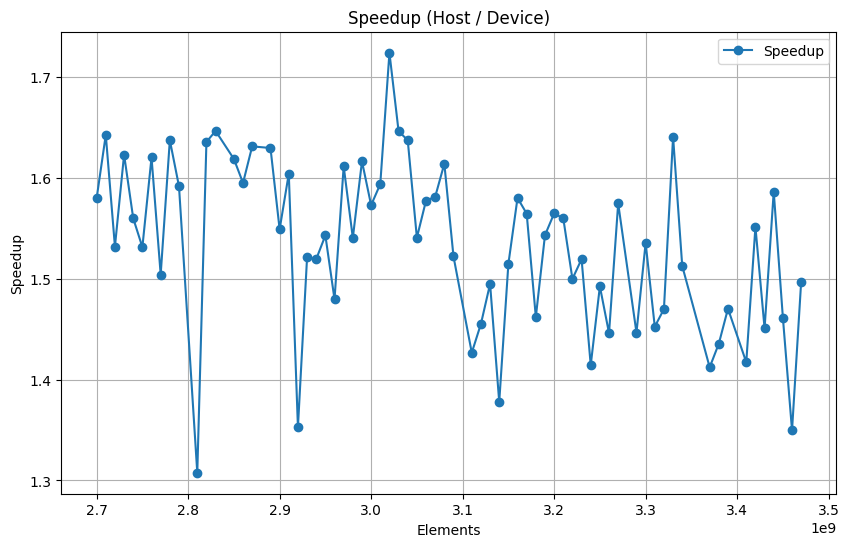

In [9]:
# Aceleration plot

plt.figure(figsize=(10, 6))

x_values = df['elements']
y_values_1 = df['time_host']
y_values_2 = df['time_dev']

acelearation = y_values_1 / y_values_2

plt.plot(x_values, acelearation, label='Speedup', marker='o')

plt.xlabel('Elements')
plt.ylabel('Speedup')

plt.title('Speedup (Host / Device)')
plt.grid()
plt.legend()

plt.savefig(dir_img + '/speedup.png')

plt.show()